# Notebook Imports

In [238]:
from os import walk
from os.path import join

import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np


import nltk    #natural language toolkit
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from bs4 import BeautifulSoup
from wordcloud import WordCloud
from PIL import Image  #PIL is short for pillow (help for image manipulation and processing)


from sklearn.model_selection import train_test_split

%matplotlib inline

# Constants

In [383]:
EXAMPLE_FILE = r'SpamData\01_Processing\practice_email.txt'

SPAM_1_PATH = r'SpamData\01_Processing\spam_assassin_corpus\spam_1'
SPAM_2_PATH = r'SpamData\01_Processing\spam_assassin_corpus\spam_2'
EASY_NONSPAM_1_PATH = r'SpamData\01_Processing\spam_assassin_corpus\easy_ham_1'
EASY_NONSPAM_2_PATH = r'SpamData\01_Processing\spam_assassin_corpus\easy_ham_2'

SPAM_CAT = 1  #spam email category
HAM_CAT =  0   # not spam category
VOCAB_SIZE = 2500


DATA_JSON_FILE =  r'SpamData\01_Processing\email-text-data.json'
WORD_ID_FILE =  r'SpamData\01_Processing\word-by-id.csv'

TRAINING_DATA_FILE = r'SpamData\02_Training\train-data.txt'
TEST_DATA_FILE = r'SpamData\02_Training\test-data.txt'

WHALE_FILE = r'SpamData\01_Processing\wordcloud_resources\whale-icon.png'
SKULL_FILE = r'SpamData\01_Processing\wordcloud_resources\skull-icon.png'
THUMBS_UP_FILE = r'SpamData\01_Processing\wordcloud_resources\thumbs-up.png'
THUMBS_DOWN_FILE = r'SpamData\01_Processing\wordcloud_resources\thumbs-down.png'
CUSTOM_FONT_FILE =  r'SpamData\01_Processing\wordcloud_resources\OpenSansCondensed-Bold.ttf'

## Reading Files

Reading single file

stram: the kind of object,that we need to read a file from the disk is called a stream or a file object. 

In [3]:
stream = open(EXAMPLE_FILE, encoding= 'latin-1')

message = stream.read()

stream.close()

print(message)

From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002
Return-Path: <exmh-workers-admin@spamassassin.taint.org>
Delivered-To: zzzz@localhost.netnoteinc.com
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36
	for <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)
Received: from phobos [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 12:36:16 +0100 (IST)
Received: from listman.spamassassin.taint.org (listman.spamassassin.taint.org [66.187.233.211]) by
    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MBYrZ04811 for
    <zzzz-exmh@spamassassin.taint.org>; Thu, 22 Aug 2002 12:34:53 +0100
Received: from listman.spamassassin.taint.org (localhost.localdomain [127.0.0.1]) by
    listman.redhat.com (Postfix) with ESMTP id 8386540858; Thu, 22 Aug 2002
    07:35:02 -0400 (EDT)
Delivered-To: exmh-workers@listman.spamassassin.taint.org
Received: from int-mx1.corp

Encoding : is how the computer handles letters and text.
every character needs to be translated into ones and zeros at the end of the day.

In [4]:
import sys
sys.getfilesystemencoding()


'utf-8'

In [5]:
# for the purpose of spam classifier, we only deal with the body of the email and ignore the header

In [6]:
#Extract the text in the email body

stream = open(EXAMPLE_FILE, encoding= 'latin-1')

is_body = False
lines =[]


for line in stream:                    # single line from the textfile
    if is_body:                        # if you are inside the email body,
        lines.append(line)             #it will take our list - lines; and append a single line from our text file to the list if we are inside the emailbody.
    elif line == '\n':                 # \n -> new charachter
        is_body =True
        

stream.close()


email_body = '\n'.join(lines)        # print the email body                                          
print(email_body)





Dear Mr Still



Good tidings to you and all your staff for the festive season ahead (Christmas).

Now to the crux of the matter-in-hand: I am a fully qualified Santa Claus and am wondering whether you might consider me to run my own "Santa's Grotto" in your store.

But WAIT! You're probably thinking: "What makes him so special?"

Well, first of all, I have made several changes to the characterisation of Father Christmas. Rather than greeting the children with shouts of "Ho, ho, ho!" I prefer to whisper the phrase "Dependence is not unfathomable in this cruel world we live in". In addition, my gifts are ALL hand-made, ranging from felt hoops to vanilla-pod holders.

You will note also, from the enclosed sketch, that I have radically redesigned Santa's outfit and have renamed my character "Lord Buckles". Would you be interested in employing me? I promise NEVER to let you down.

I look forward to hearing from you.



Best wishes

Robin Cooper

[Excerpt from the book: The Timewaster Let

# Generator Functions

In [7]:
#practice generator function  # use yield to execute our iterator
def generate_squares(N):
    for my_number in range(N):
        yield my_number ** 2

In [8]:
for i in generate_squares(5):
    print(i, end = ' ->')

0 ->1 ->4 ->9 ->16 ->

## Email Body Extraction

define a generator function that walks over all the file names in a particular folder
path -> #take the relative path to one of our folder (spam or legitimate emails)
walk function is where our operating system comes in (not a builtin fun, it belongs to os library)
walk function generate the file names in directory by walking the tree from top to the bottom 
and yields "Tupls" -> dir path(1), dir name(2), file name(3)
    


root : Prints out directories only from what you specified.
dirs : Prints out sub-directories from root.
files : Prints out all files from root and directories.

In [9]:
def email_body_generator(path):
    
    for root, dirname, filenames in walk(path):   # all the filenames that can retrive by walk function
        for file_name in filenames:
            
            filepath = join(root, file_name)
            
            stream = open(filepath, encoding= 'latin-1')

            is_body = False
            lines = []

            for line in stream:                  
                if is_body:                       
                    lines.append(line)              
                elif line == '\n':                 
                    is_body =True

            stream.close()

            email_body = '\n'.join(lines)                                          
            
            yield file_name, email_body


In [10]:
def df_from_directory(path, classification):           # classification means whether spam or legitimate email
    rows =[]
    row_names =[]
    
    for file_name, email_body in email_body_generator(path):
        
        rows.append({'MESSAGE' : email_body, 'CATEGORY':classification})
        row_names.append(file_name)
                 
    return pd.DataFrame(rows, index=row_names)             

In [11]:
spam_emails_1 = df_from_directory(SPAM_1_PATH, 1)
spam_emails_1.head()

,MESSAGE,CATEGORY
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00004.eac8de8d759b7e74154f142194282724,##############################################...,1
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1


In [12]:
spam_emails = df_from_directory(SPAM_1_PATH, SPAM_CAT)
spam_emails = spam_emails.append(df_from_directory(SPAM_2_PATH, SPAM_CAT))
spam_emails.head()

C:\Users\tmost\AppData\Local\Temp\ipykernel_22360\2860214245.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  spam_emails = spam_emails.append(df_from_directory(SPAM_2_PATH, SPAM_CAT))


,MESSAGE,CATEGORY
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00004.eac8de8d759b7e74154f142194282724,##############################################...,1
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1


In [13]:
spam_emails.shape

(1898, 2)

In [14]:
## Chalenge: Create a dataframe containing the non-spam emails 
# print out the shape of this dataframe

ham_emails = df_from_directory(EASY_NONSPAM_1_PATH, HAM_CAT)
ham_emails = ham_emails.append(df_from_directory(EASY_NONSPAM_2_PATH, HAM_CAT))
ham_emails.head()

C:\Users\tmost\AppData\Local\Temp\ipykernel_22360\98475766.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ham_emails = ham_emails.append(df_from_directory(EASY_NONSPAM_2_PATH, HAM_CAT))


,MESSAGE,CATEGORY
00001.7c53336b37003a9286aba55d2945844c,"Date: Wed, 21 Aug 2002 10:54:46 -05...",0
00002.9c4069e25e1ef370c078db7ee85ff9ac,"Martin A posted:\n\nTassos Papadopoulos, the G...",0
00003.860e3c3cee1b42ead714c5c874fe25f7,Man Threatens Explosion In Moscow \n\n\n\nThur...,0
00004.864220c5b6930b209cc287c361c99af1,Klez: The Virus That Won't Die\n\n \n\nAlready...,0
00005.bf27cdeaf0b8c4647ecd61b1d09da613,"> in adding cream to spaghetti carbonara, whi...",0


In [15]:
ham_emails.shape

(3901, 2)

In [16]:
data = pd.concat([spam_emails, ham_emails])
print('Shape of entire dataframe is:',data.shape)
data.head()

Shape of entire dataframe is: (5799, 2)


,MESSAGE,CATEGORY
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00004.eac8de8d759b7e74154f142194282724,##############################################...,1
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1


In [17]:
data.tail()

,MESSAGE,CATEGORY
01396.61983fbe6ec43f55fd44e30fce24ffa6,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7,"> >-- be careful when using this one.) Also, t...",0
01398.169b51731fe569f42169ae8f948ec676,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",0
01400.f897f0931e461e7b2e964d28e927c35e,"Hi there,\n\n\n\nNow this is probably of no us...",0


What we have done so far:

    - Extract relevant data (email bodies)
    - Convert format from text file to pandas dataframe
    - Now check for empthy email
    - Check for null or missing values

# Data Cleaning: Checking for Missing Values

In [18]:
# Check if any message bodies are equal to null
#data.MESSAGE
# or by code below
data['MESSAGE']

00001.7848dde101aa985090474a91ec93fcf0    <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Tr...
00002.d94f1b97e48ed3b553b3508d116e6a09    1) Fight The Risk of Cancer!\n\nhttp://www.adc...
00003.2ee33bc6eacdb11f38d052c44819ba6c    1) Fight The Risk of Cancer!\n\nhttp://www.adc...
00004.eac8de8d759b7e74154f142194282724    ##############################################...
00005.57696a39d7d84318ce497886896bf90d    I thought you might like these:\n\n1) Slim Dow...
                                                                ...                        
01396.61983fbe6ec43f55fd44e30fce24ffa6    http://news.bbc.co.uk/1/hi/england/2515127.stm...
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7    > >-- be careful when using this one.) Also, t...
01398.169b51731fe569f42169ae8f948ec676    >>>>> "SM" == Skip Montanaro <skip@pobox.com> ...
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896    So then, "Mark Hammond" <mhammond@skippinet.co...
01400.f897f0931e461e7b2e964d28e927c35e    Hi there,\n\n\n\nNow this is probably 

In [19]:
# check miss value
data['MESSAGE'].isnull()

00001.7848dde101aa985090474a91ec93fcf0    False
00002.d94f1b97e48ed3b553b3508d116e6a09    False
00003.2ee33bc6eacdb11f38d052c44819ba6c    False
00004.eac8de8d759b7e74154f142194282724    False
00005.57696a39d7d84318ce497886896bf90d    False
                                          ...  
01396.61983fbe6ec43f55fd44e30fce24ffa6    False
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7    False
01398.169b51731fe569f42169ae8f948ec676    False
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896    False
01400.f897f0931e461e7b2e964d28e927c35e    False
Name: MESSAGE, Length: 5799, dtype: bool

In [20]:
# check miss value
data['MESSAGE'].isnull().values.any()

False

In [21]:
# missing values is not empty emails

In [22]:
my_var = None

In [23]:
type(my_var)

NoneType

In [24]:
# Check if there are any empthy emails (String length Zero)
data.MESSAGE.str.len() 

00001.7848dde101aa985090474a91ec93fcf0    3966
00002.d94f1b97e48ed3b553b3508d116e6a09     820
00003.2ee33bc6eacdb11f38d052c44819ba6c     669
00004.eac8de8d759b7e74154f142194282724    3004
00005.57696a39d7d84318ce497886896bf90d     687
                                          ... 
01396.61983fbe6ec43f55fd44e30fce24ffa6    1221
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7     620
01398.169b51731fe569f42169ae8f948ec676    3244
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896     804
01400.f897f0931e461e7b2e964d28e927c35e    4143
Name: MESSAGE, Length: 5799, dtype: int64

In [25]:
data.MESSAGE.str.len() == 0

00001.7848dde101aa985090474a91ec93fcf0    False
00002.d94f1b97e48ed3b553b3508d116e6a09    False
00003.2ee33bc6eacdb11f38d052c44819ba6c    False
00004.eac8de8d759b7e74154f142194282724    False
00005.57696a39d7d84318ce497886896bf90d    False
                                          ...  
01396.61983fbe6ec43f55fd44e30fce24ffa6    False
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7    False
01398.169b51731fe569f42169ae8f948ec676    False
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896    False
01400.f897f0931e461e7b2e964d28e927c35e    False
Name: MESSAGE, Length: 5799, dtype: bool

In [26]:
#There are some empthy email
(data.MESSAGE.str.len() == 0).any()

True

In [27]:
(data.MESSAGE.str.len() == 0).sum()

3

In [28]:
# Challenge: check the number of enteries with null/None values?
data.MESSAGE.isnull().sum()

0

### Locate empty emails

In [29]:
# here are logical condition
type(data.MESSAGE.str.len() == 0)

pandas.core.series.Series

In [30]:
# these are the system files
data[data.MESSAGE.str.len() == 0].index

Index(['cmds', 'cmds', 'cmds'], dtype='object')

In [31]:
# This "cmds" file is actually a system file that you'll see both on Windows and Mac when you unzip the original email archive.

In [32]:
# this "DS_Store" file is actually a hidden file.

# This is a Mac OS specific file that stores the attributes of a particular folder. And this system file was created when I downloaded, unzipped and then rezipped the course materials.

In [33]:
data.index.get_loc('cmds').any()

True

# Remove System File Entries from DataFrame

In [34]:
# how to drop certain undesirable rows from a dataframe

In [35]:
data = data.drop(['cmds'])
# or
# data.drop(['cmds'],inplace = True)

In [36]:
data.shape

(5796, 2)

# Add Document IDs to track Emails in Dataset

In [37]:
# how we can change up the index on our dataframe to add document IDs to track these emails,

In [38]:
document_ids = range(0,len(data.index))
data['DOC_ID'] = document_ids

In [39]:
data.DOC_ID

00001.7848dde101aa985090474a91ec93fcf0       0
00002.d94f1b97e48ed3b553b3508d116e6a09       1
00003.2ee33bc6eacdb11f38d052c44819ba6c       2
00004.eac8de8d759b7e74154f142194282724       3
00005.57696a39d7d84318ce497886896bf90d       4
                                          ... 
01396.61983fbe6ec43f55fd44e30fce24ffa6    5791
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7    5792
01398.169b51731fe569f42169ae8f948ec676    5793
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896    5794
01400.f897f0931e461e7b2e964d28e927c35e    5795
Name: DOC_ID, Length: 5796, dtype: int64

In [40]:
data['FILE_NAME'] = data.index
data.set_index('DOC_ID', inplace= True)
data.head()

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,00001.7848dde101aa985090474a91ec93fcf0
1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00002.d94f1b97e48ed3b553b3508d116e6a09
2,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00003.2ee33bc6eacdb11f38d052c44819ba6c
3,##############################################...,1,00004.eac8de8d759b7e74154f142194282724
4,I thought you might like these:\n\n1) Slim Dow...,1,00005.57696a39d7d84318ce497886896bf90d


In [41]:
data.tail()

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
5791,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0,01396.61983fbe6ec43f55fd44e30fce24ffa6
5792,"> >-- be careful when using this one.) Also, t...",0,01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7
5793,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0,01398.169b51731fe569f42169ae8f948ec676
5794,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",0,01399.ca6b00b7b341bbde9a9ea3dd6a7bf896
5795,"Hi there,\n\n\n\nNow this is probably of no us...",0,01400.f897f0931e461e7b2e964d28e927c35e


# Save to File using Pandas

In [42]:
data.to_json(DATA_JSON_FILE)

In [43]:
# Data Visualization pie chart and Doughnut chart

# Number of Spam Messages Visuallized (Pie Charts)

In [44]:
# How many spam and non spam messeges there are
data.CATEGORY.value_counts()

0    3900
1    1896
Name: CATEGORY, dtype: int64

In [45]:
amount_of_spam = data.CATEGORY.value_counts()[1]
amount_of_ham =data.CATEGORY.value_counts()[0]

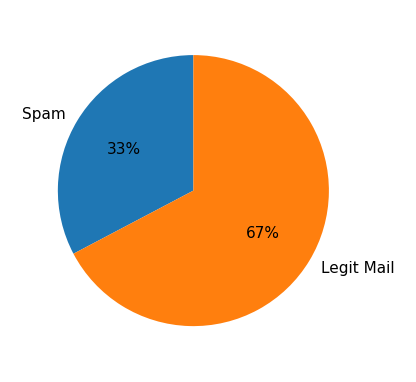

In [46]:
category_name =['Spam','Legit Mail']
sizes = [amount_of_spam, amount_of_ham]


plt.figure(figsize=(2,2), dpi=220 )
plt.pie(sizes, labels=category_name, textprops= {'fontsize':5}, startangle= 90, 
       autopct = '%1.0f%%',)
plt.show()

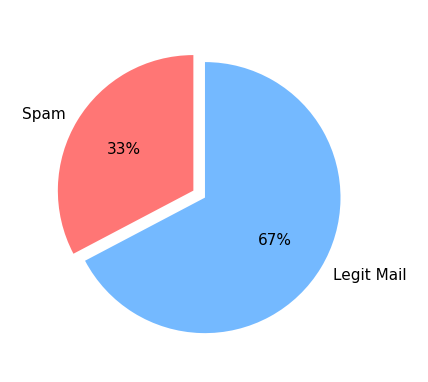

In [47]:
category_name =['Spam','Legit Mail']
sizes = [amount_of_spam, amount_of_ham]
custom_color = ['#ff7675','#74b9ff'] #flat UI colors

plt.figure(figsize=(2,2), dpi=220 )
plt.pie(sizes, labels=category_name, textprops= {'fontsize':5}, startangle= 90, 
       autopct = '%1.0f%%',colors =custom_color,explode=[0, 0.1])
plt.show()

# Doughnut chart

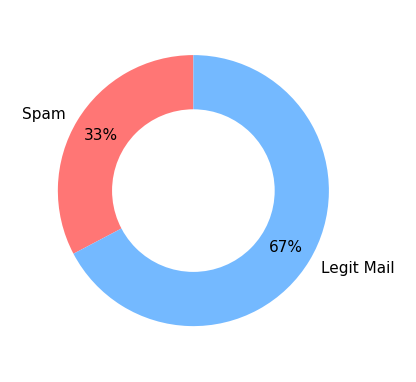

In [48]:
category_name =['Spam','Legit Mail']
sizes = [amount_of_spam, amount_of_ham]
custom_color = ['#ff7675','#74b9ff']

plt.figure(figsize=(2,2), dpi=220 )
plt.pie(sizes, labels=category_name, textprops= {'fontsize':5}, startangle= 90, 
       autopct = '%1.0f%%',colors =custom_color, pctdistance = 0.8)

#Draw circle

center_circle = plt.Circle((0,0), radius=0.6 , fc='white')
plt.gca().add_artist(center_circle)

plt.show()

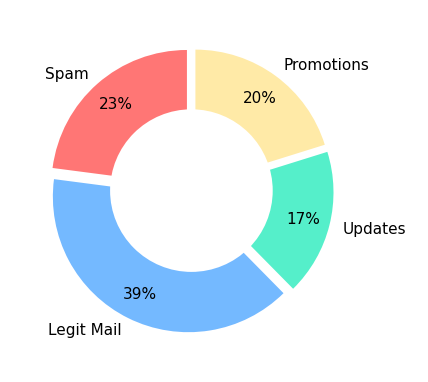

In [49]:
category_name =['Spam','Legit Mail', 'Updates','Promotions']
sizes = [25,43,19,22]
custom_color = ['#ff7675','#74b9ff','#55efca','#ffeaa7']
offset =[0.05,0.05,0.05,0.05]

plt.figure(figsize=(2,2), dpi=220 )
plt.pie(sizes, labels=category_name, textprops= {'fontsize':5}, startangle= 90, 
       autopct = '%1.0f%%',colors =custom_color, pctdistance = 0.8, explode=offset )

#Draw circle

center_circle = plt.Circle((0,0), radius=0.6 , fc='white')
plt.gca().add_artist(center_circle)

plt.show()

In [50]:
# we create a circle using matplotlib
#Circle () is equivalent to pd.DataFrame -> we have supplied a couple of inputs

In [51]:
data.CATEGORY

DOC_ID
0       1
1       1
2       1
3       1
4       1
       ..
5791    0
5792    0
5793    0
5794    0
5795    0
Name: CATEGORY, Length: 5796, dtype: int64

In [52]:
amount_of_spam = data.CATEGORY.value_counts()[0]
amount_of_spam

3900

# Natural Language Processing

### Text Pre-Processing

In [53]:
# Convert to a lower case
msg = 'All work and no play makes Jack a dull boy.' 
msg.lower()

'all work and no play makes jack a dull boy.'

In [54]:
# for other part pf pre-processing -> Natural Language Toolkit (NLTK)

###  Download the NLTK Resources (Tokenizer & Stopwords)

In [55]:
nltk.download('punkt', download_dir = 'C:/Users/tmost/Documents/Data-course/Udemy_Bootcamp')

[nltk_data] Downloading package punkt to
[nltk_data]     C:/Users/tmost/Documents/Data-course/Udemy_Bootcamp...
[nltk_data]   Package punkt is already up-to-date!


True

In [56]:
nltk.download('stopwords', download_dir = 'C:/Users/tmost/Documents/Data-course/Udemy_Bootcamp' )

[nltk_data] Downloading package stopwords to
[nltk_data]     C:/Users/tmost/Documents/Data-course/Udemy_Bootcamp...
[nltk_data]   Package stopwords is already up-to-date!


True

In [57]:
nltk.download('gutenberg',download_dir = 'C:/Users/tmost/Documents/Data-course/Udemy_Bootcamp')
nltk.download('shakespeare',download_dir = 'C:/Users/tmost/Documents/Data-course/Udemy_Bootcamp')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:/Users/tmost/Documents/Data-course/Udemy_Bootcamp...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package shakespeare to
[nltk_data]     C:/Users/tmost/Documents/Data-course/Udemy_Bootcamp...
[nltk_data]   Package shakespeare is already up-to-date!


True

# Tokenizing

In [58]:
from nltk.tokenize import word_tokenize

msg = 'All work and no play makes Jack a dull boy.' 
word_tokenize(msg)

['All', 'work', 'and', 'no', 'play', 'makes', 'Jack', 'a', 'dull', 'boy', '.']

In [59]:
# now tokenize and lowercase at the sametime
msg = 'All work and no play makes Jack a dull boy.' 
word_tokenize(msg.lower())

['all', 'work', 'and', 'no', 'play', 'makes', 'jack', 'a', 'dull', 'boy', '.']

In [60]:
# How do you efficiently check if a particular value is contained in a collection?  set

# Removing the Stop Words

In [61]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [62]:
type(stopwords.words('german'))

list

In [63]:
stop_words = set(stopwords.words('english'))

In [64]:
type(stop_words)

set

In [65]:
if 'this' in stop_words:
    print('found it!')

found it!


In [66]:
if 'hello' not in stop_words:
    print('Not in here!')

Not in here!


In [67]:
msg = 'All work and no play makes Jack a dull boy.To be or not to be'

words= word_tokenize(msg.lower())
 

In [68]:
filttered_words= []

for word in words:
    if word not in stop_words:
        filttered_words.append(word)
    
print(filttered_words)

['work', 'play', 'makes', 'jack', 'dull', 'boy.to']


## Word Stems and Stemming

In [69]:
msg = 'All work and no play makes Jack a dull boy.To be or not to be. \
       Nobody expects the Spanish Inquisition !'

words= word_tokenize(msg.lower())
stemmer = PorterStemmer()

filttered_words= []
for word in words:
    if word not in stop_words:
        stemmed_word = stemmer.stem(word)
        filttered_words.append(stemmed_word)
    
print(filttered_words)

['work', 'play', 'make', 'jack', 'dull', 'boy.to', '.', 'nobodi', 'expect', 'spanish', 'inquisit', '!']


In [70]:
# if you ever want to stem words and use this tool on text that is not English,the Snowball stemmer is your friend.

msg = 'All work and no play makes Jack a dull boy.To be or not to be. \
       Nobody expects the Spanish Inquisition !'
words= word_tokenize(msg.lower())

stemmer = SnowballStemmer('english')

filttered_words= []
for word in words:
    if word not in stop_words:
        stemmed_word = stemmer.stem(word)
        filttered_words.append(stemmed_word)
    
print(filttered_words)

['work', 'play', 'make', 'jack', 'dull', 'boy.to', '.', 'nobodi', 'expect', 'spanish', 'inquisit', '!']


## Remove the Puncutuation

In [71]:
'p'.isalpha()

True

In [72]:
'?'.isalpha()

False

In [73]:
# For remove the punctuation --> add isalpha to the code

msg = 'All work and no play makes Jack a dull boy.To be or not to be. ???\
       Nobody expects the Spanish Inquisition !'

words= word_tokenize(msg.lower())
stemmer = SnowballStemmer('english')

filttered_words= []

for word in words:
    if word not in stop_words and word.isalpha():
        stemmed_word = stemmer.stem(word)
        filttered_words.append(stemmed_word)
 
print(filttered_words)

['work', 'play', 'make', 'jack', 'dull', 'nobodi', 'expect', 'spanish', 'inquisit']


## Removing HTML tags from Emails

In [74]:
# using "at" -> efficient way of looking single value in the pandas dataframe.
# (2 -> index name) (Message -> column name)
data.at[2, 'MESSAGE']

"1) Fight The Risk of Cancer!\n\nhttp://www.adclick.ws/p.cfm?o=315&s=pk007\n\n\n\n2) Slim Down - Guaranteed to lose 10-12 lbs in 30 days\n\nhttp://www.adclick.ws/p.cfm?o=249&s=pk007\n\n\n\n3) Get the Child Support You Deserve - Free Legal Advice\n\nhttp://www.adclick.ws/p.cfm?o=245&s=pk002\n\n\n\n4) Join the Web's Fastest Growing Singles Community\n\nhttp://www.adclick.ws/p.cfm?o=259&s=pk007\n\n\n\n5) Start Your Private Photo Album Online!\n\nhttp://www.adclick.ws/p.cfm?o=283&s=pk007\n\n\n\nHave a Wonderful Day,\n\nOffer Manager\n\nPrizeMama\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nIf you wish to leave this list please use the link below.\n\nhttp://www.qves.com/trim/?zzzz@spamassassin.taint.org%7C17%7C308417\n\n\n"

In [75]:
soup = BeautifulSoup(data.at[2, 'MESSAGE'], 'html.parser')
print(soup.prettify())

1) Fight The Risk of Cancer!

http://www.adclick.ws/p.cfm?o=315&amp;s=pk007



2) Slim Down - Guaranteed to lose 10-12 lbs in 30 days

http://www.adclick.ws/p.cfm?o=249&amp;s=pk007



3) Get the Child Support You Deserve - Free Legal Advice

http://www.adclick.ws/p.cfm?o=245&amp;s=pk002



4) Join the Web's Fastest Growing Singles Community

http://www.adclick.ws/p.cfm?o=259&amp;s=pk007



5) Start Your Private Photo Album Online!

http://www.adclick.ws/p.cfm?o=283&amp;s=pk007



Have a Wonderful Day,

Offer Manager

PrizeMama



























If you wish to leave this list please use the link below.

http://www.qves.com/trim/?zzzz@spamassassin.taint.org%7C17%7C308417



In [76]:
#remove the html tags
soup.get_text()

"1) Fight The Risk of Cancer!\n\nhttp://www.adclick.ws/p.cfm?o=315&s=pk007\n\n\n\n2) Slim Down - Guaranteed to lose 10-12 lbs in 30 days\n\nhttp://www.adclick.ws/p.cfm?o=249&s=pk007\n\n\n\n3) Get the Child Support You Deserve - Free Legal Advice\n\nhttp://www.adclick.ws/p.cfm?o=245&s=pk002\n\n\n\n4) Join the Web's Fastest Growing Singles Community\n\nhttp://www.adclick.ws/p.cfm?o=259&s=pk007\n\n\n\n5) Start Your Private Photo Album Online!\n\nhttp://www.adclick.ws/p.cfm?o=283&s=pk007\n\n\n\nHave a Wonderful Day,\n\nOffer Manager\n\nPrizeMama\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nIf you wish to leave this list please use the link below.\n\nhttp://www.qves.com/trim/?zzzz@spamassassin.taint.org%7C17%7C308417\n\n\n"

# Creating a function for Text processing

In [77]:
def clean_message(message,stemmer = PorterStemmer(),
                stop_word=set(stopwords.words('english'))):
    
    # convert to lowercase and splits up the individual words
    words = word_tokenize(message.lower())
    
    filterd_words = []
    
    for word in words:
        # Remove the stop words and punctuation
        if word not in stop_words and word.isalpha():
            filterd_words.append(stemmer.stem(word))
     
    return filterd_words

In [78]:
# call the function   # use early above example 
clean_message(email_body)

['dear',
 'mr',
 'still',
 'good',
 'tide',
 'staff',
 'festiv',
 'season',
 'ahead',
 'christma',
 'crux',
 'fulli',
 'qualifi',
 'santa',
 'clau',
 'wonder',
 'whether',
 'might',
 'consid',
 'run',
 'santa',
 'grotto',
 'store',
 'wait',
 'probabl',
 'think',
 'make',
 'special',
 'well',
 'first',
 'made',
 'sever',
 'chang',
 'characteris',
 'father',
 'christma',
 'rather',
 'greet',
 'children',
 'shout',
 'ho',
 'ho',
 'ho',
 'prefer',
 'whisper',
 'phrase',
 'depend',
 'unfathom',
 'cruel',
 'world',
 'live',
 'addit',
 'gift',
 'rang',
 'felt',
 'hoop',
 'holder',
 'note',
 'also',
 'enclos',
 'sketch',
 'radic',
 'redesign',
 'santa',
 'outfit',
 'renam',
 'charact',
 'lord',
 'buckl',
 'would',
 'interest',
 'employ',
 'promis',
 'never',
 'let',
 'look',
 'forward',
 'hear',
 'best',
 'wish',
 'robin',
 'cooper',
 'excerpt',
 'book',
 'timewast',
 'letter',
 'robin',
 'cooper']

In [151]:
# Challenge: Modify the function to remove HTML tags

def clean_msg_no_html(message,stemmer = PorterStemmer(),
                stop_word=set(stopwords.words('english'))):
    
    #Remove the HTML tags
    soup = BeautifulSoup(message,'html.parser') # need two arguments
    clean_text = soup.get_text()
    
    # convert to lowercase and splits up the individual words
    words = word_tokenize(clean_text.lower())
    
    filterd_words = []
    
    for word in words:
        # Remove the stop words and punctuation
        if word not in stop_words and word.isalpha():
             filterd_words.append(stemmer.stem(word))  # stem
            #filterd_words.append(word)         # orignal words
    
    
    
    return filterd_words

In [80]:
clean_msg_no_html(data.at[2,'MESSAGE'])

['fight',
 'risk',
 'cancer',
 'http',
 'slim',
 'guaranteed',
 'lose',
 'lbs',
 'days',
 'http',
 'get',
 'child',
 'support',
 'deserve',
 'free',
 'legal',
 'advice',
 'http',
 'join',
 'web',
 'fastest',
 'growing',
 'singles',
 'community',
 'http',
 'start',
 'private',
 'photo',
 'album',
 'online',
 'http',
 'wonderful',
 'day',
 'offer',
 'manager',
 'prizemama',
 'wish',
 'leave',
 'list',
 'please',
 'use',
 'link',
 'http',
 'zzzz']

#  Apply the cleaning and tokenization to all the 5800 messages.

### Slicing Dataframe and Series & Creating Subsets

In [81]:
# at attribute -> index name, and column name
# at attribute works of a names if you want to work with position like 1,2,3  -> then use alternative data.iat
data.at[2, 'MESSAGE']  

"1) Fight The Risk of Cancer!\n\nhttp://www.adclick.ws/p.cfm?o=315&s=pk007\n\n\n\n2) Slim Down - Guaranteed to lose 10-12 lbs in 30 days\n\nhttp://www.adclick.ws/p.cfm?o=249&s=pk007\n\n\n\n3) Get the Child Support You Deserve - Free Legal Advice\n\nhttp://www.adclick.ws/p.cfm?o=245&s=pk002\n\n\n\n4) Join the Web's Fastest Growing Singles Community\n\nhttp://www.adclick.ws/p.cfm?o=259&s=pk007\n\n\n\n5) Start Your Private Photo Album Online!\n\nhttp://www.adclick.ws/p.cfm?o=283&s=pk007\n\n\n\nHave a Wonderful Day,\n\nOffer Manager\n\nPrizeMama\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nIf you wish to leave this list please use the link below.\n\nhttp://www.qves.com/trim/?zzzz@spamassassin.taint.org%7C17%7C308417\n\n\n"

In [82]:
data.iat[213, 2]  #position number 2 and column number 1   

'00214.1367039e50dc6b7adb0f2aa8aba83216'

In [83]:
data.iat[213, 0]  #position number 2 and column number 1   

'This is a multi-part message in MIME format.\n\n\n\n------=_NextPart_000_1CDC19_01C25366.4B57F3A0\n\nContent-Type: text/plain;\n\n\tcharset="Windows-1252"\n\nContent-Transfer-Encoding: quoted-printable\n\n\n\n We dare you...\n\n Try to find a better annuity!\n\n=20\n\n  - 5.40% Guaranteed for 6 Years=0A=\n\n- 6 Year Surrender Charge=0A=\n\n- 5% Agent\n\nCommission up to age 80=09\n\nCall today for more information!\n\n 800-888-7641 ext. 103\n\n- or -\n\n\n\nPlease fill out the form below for more information\t=20\n\nName:\t \t  =09\n\nE-mail:\t \t=20\n\nPhone:\t \t=20\n\nCity:\t \t State:\t \t=20\n\n \t    =09\n\n=20\n\n PMG Financial Services\n\n*5.40% for deposits of $100,000 and up, 5.25% interest for deposits\n\ntotalling $25,000-$99,999.\t=20\n\nWe don\'t want anyone to receive our mailings who does not wish to\n\nreceive them. This is a professional communication sent to insurance\n\nprofessionals. To be removed from this mailing list, DO NOT REPLY to\n\nthis message. Instead, g

In [84]:
data.head()

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,00001.7848dde101aa985090474a91ec93fcf0
1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00002.d94f1b97e48ed3b553b3508d116e6a09
2,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00003.2ee33bc6eacdb11f38d052c44819ba6c
3,##############################################...,1,00004.eac8de8d759b7e74154f142194282724
4,I thought you might like these:\n\n1) Slim Dow...,1,00005.57696a39d7d84318ce497886896bf90d


In [85]:
data.iloc[0:2]

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,00001.7848dde101aa985090474a91ec93fcf0
1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00002.d94f1b97e48ed3b553b3508d116e6a09


In [86]:
data.iloc[[248,372]]   #iloc attribute   # the first two rows    as my data different I find the index myself!

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
248,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",1,00249.5f45607c1bffe89f60ba1ec9f878039a
372,ATTENTION: This is a MUST for ALL Computer Use...,1,00373.ebe8670ac56b04125c25100a36ab0510


In [87]:
data.iat[248,0] 

'Dear Homeowner,\n\n \n\nInterest Rates are at their lowest point in 40 years!\n\n\n\nWe help you find the best rate for your situation by\n\nmatching your needs with hundreds of lenders!\n\n\n\nHome Improvement, Refinance, Second Mortgage,\n\nHome Equity Loans, and More! Even with less than\n\nperfect credit!\n\n\n\nThis service is 100% FREE to home owners and new\n\nhome buyers without any obligation. \n\n\n\nJust fill out a quick, simple form and jump-start\n\nyour future plans today!\n\n\n\n\n\nVisit http://61.145.116.186/user0201/index.asp?Afft=QM10\n\n\n\n\n\n\n\n\n\n\n\n\n\nTo unsubscribe, please visit:\n\n\n\nhttp://61.145.116.186/light/watch.asp\n\n\n\n\n'

In [88]:
data.iloc[5:11]

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
5,A POWERHOUSE GIFTING PROGRAM You Don't Want To...,1,00006.5ab5620d3d7c6c0db76234556a16f6c1
6,Help wanted. We are a 14 year old fortune 500...,1,00007.d8521faf753ff9ee989122f6816f87d7
7,<html>\n\n<head>\n\n<title>ReliaQuote - Save U...,1,00008.dfd941deb10f5eed78b1594b131c9266
8,TIRED OF THE BULL OUT THERE?\n\nWant To Stop L...,1,00009.027bf6e0b0c4ab34db3ce0ea4bf2edab
9,"Dear ricardo1 ,\n\n\n\n<html>\n\n<body>\n\n<ce...",1,00010.445affef4c70feec58f9198cfbc22997
10,Cellular Phone Accessories All At Below Wholes...,1,00011.61816b9ad167657773a427d890d0468e


In [89]:
data.MESSAGE.iloc[0:3]

DOC_ID
0    <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Tr...
1    1) Fight The Risk of Cancer!\n\nhttp://www.adc...
2    1) Fight The Risk of Cancer!\n\nhttp://www.adc...
Name: MESSAGE, dtype: object

In [90]:
# we want to try out our "clean_message" function on the first 3 emails out of the 5800 odd emails.

In [91]:
first_emails = data.MESSAGE.iloc[0:3] # step1:select the email bodies

nested_list = first_emails.apply(clean_message) #step2: using pandas apply function
len(nested_list)

3

In [92]:
# What if I wanted just one list of words? What if I didn't want a list of lists?

In [93]:
# list of words
flat_list = [] 

for sublist in nested_list:
    for item in sublist:
        flat_list.append(item)

len(flat_list)

321

In [94]:
flat_list

['doctyp',
 'html',
 'public',
 'html',
 'html',
 'head',
 'meta',
 'ype',
 'meta',
 'mshtml',
 'bodi',
 'insert',
 'calypso',
 'tabl',
 'color',
 'black',
 'display',
 'none',
 'tbodi',
 'tr',
 'td',
 'hr',
 'noshad',
 'tr',
 'td',
 'hr',
 'noshad',
 'end',
 'calypso',
 'insert',
 'font',
 'arial',
 'helvetica',
 'br',
 'end',
 'calypso',
 'font',
 'copperpl',
 'gothic',
 'bold',
 'center',
 'save',
 'life',
 'font',
 'copperpl',
 'gothic',
 'bold',
 'center',
 'spend',
 'center',
 'font',
 'copperpl',
 'gothic',
 'bold',
 'center',
 'life',
 'quot',
 'save',
 'center',
 'p',
 'p',
 'br',
 'p',
 'center',
 'tabl',
 'tbodi',
 'tabl',
 'tbodi',
 'tr',
 'td',
 'b',
 'font',
 'g',
 'famili',
 'financi',
 'secur',
 'import',
 'life',
 'quot',
 'save',
 'ke',
 'buy',
 'life',
 'insur',
 'simpl',
 'afford',
 'provid',
 'free',
 'access',
 'best',
 'compani',
 'lowest',
 'tr',
 'td',
 'tabl',
 'tbodi',
 'tr',
 'td',
 'font',
 'b',
 'life',
 'quot',
 'save',
 'fast',
 'save',
 'money',
 'let',

In [95]:
# python list comprehension       # do above code in one line   move the lope inside the bracket
flat_list = [item for sublist in nested_list for item in sublist]
len(flat_list)

321

In [96]:
type(flat_list)

list

In [97]:
%%time

# use apply for all over 5800 emails
nested_list = data.MESSAGE.apply(clean_msg_no_html)

C:\Users\tmost\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
C:\Users\tmost\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\bs4\__init__.py:404: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


CPU times: total: 1min 1s
Wall time: 1min 8s


In [98]:
nested_list.head()

DOC_ID
0    [save, life, insurance, spend, life, quote, sa...
1    [fight, risk, cancer, http, slim, guaranteed, ...
2    [fight, risk, cancer, http, slim, guaranteed, ...
3    [adult, club, offers, free, membership, instan...
4    [thought, might, like, slim, guaranteed, lose,...
Name: MESSAGE, dtype: object

In [99]:
nested_list.tail()

DOC_ID
5791    [http, bizarre, collection, stuffed, animals, ...
5792    [careful, using, one, also, really, cute, thin...
5793    [sm, skip, montanaro, writes, jeremy, put, ano...
5794    [mark, hammond, like, given, zodb, sounding, a...
5795    [hi, probably, use, whatsoever, also, problem,...
Name: MESSAGE, dtype: object

summary:
    now we have a nested list of all words and all the e-mails stemmed and cleaned
    we want to tackle sliceing dataframes and creating subsets

# Using Logic to Slice DataFrame

In [100]:
data['MESSAGE']

DOC_ID
0       <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Tr...
1       1) Fight The Risk of Cancer!\n\nhttp://www.adc...
2       1) Fight The Risk of Cancer!\n\nhttp://www.adc...
3       ##############################################...
4       I thought you might like these:\n\n1) Slim Dow...
                              ...                        
5791    http://news.bbc.co.uk/1/hi/england/2515127.stm...
5792    > >-- be careful when using this one.) Also, t...
5793    >>>>> "SM" == Skip Montanaro <skip@pobox.com> ...
5794    So then, "Mark Hammond" <mhammond@skippinet.co...
5795    Hi there,\n\n\n\nNow this is probably of no us...
Name: MESSAGE, Length: 5796, dtype: object

In [101]:
# suppose I want to access a subset in our data frame, say all the spam messages.

In [102]:
data [data.CATEGORY == 1].shape

(1896, 3)

In [103]:
data [data.CATEGORY == 1].tail(2)

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
1894,****Mid-Summer Customer Appreciation SALE!****...,1,01399.2319643317e2c5193d574e40a71809c2
1895,ATTN:SIR/MADAN \n\n\n\n ...,1,01400.b444b69845db2fa0a4693ca04e6ac5c5


In [104]:
# challenge: create two variables (doc_ids_spam, doc_ids_ham) which
# hold onto the indicies for the spam amd the non-spam emails respoectively

In [105]:
# indicies
doc_ids_spam =  data[data.CATEGORY == 1].index
doc_ids_ham  =  data[data.CATEGORY == 0].index

In [106]:
doc_ids_ham

Int64Index([1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905,
            ...
            5786, 5787, 5788, 5789, 5790, 5791, 5792, 5793, 5794, 5795],
           dtype='int64', name='DOC_ID', length=3900)

# Subsetting a Series with an Index

In [107]:
type(doc_ids_ham)

pandas.core.indexes.numeric.Int64Index

In [108]:
type(nested_list)

pandas.core.series.Series

In [109]:
# When you're working the series or a data frame, you can use the loc attribute  the location attributes

In [110]:
list(doc_ids_ham)

[1896,
 1897,
 1898,
 1899,
 1900,
 1901,
 1902,
 1903,
 1904,
 1905,
 1906,
 1907,
 1908,
 1909,
 1910,
 1911,
 1912,
 1913,
 1914,
 1915,
 1916,
 1917,
 1918,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023,
 2024,
 2025,
 2026,
 2027,
 2028,
 2029,
 2030,
 2031,
 2032,
 2033,
 2034,
 2035,
 2036,
 2037,
 2038,

In [111]:
nested_list_ham = nested_list.loc[doc_ids_ham]

In [112]:
nested_list_ham.shape

(3900,)

In [113]:
nested_list_ham.tail()

DOC_ID
5791    [http, bizarre, collection, stuffed, animals, ...
5792    [careful, using, one, also, really, cute, thin...
5793    [sm, skip, montanaro, writes, jeremy, put, ano...
5794    [mark, hammond, like, given, zodb, sounding, a...
5795    [hi, probably, use, whatsoever, also, problem,...
Name: MESSAGE, dtype: object

In [114]:
nested_list_spam = nested_list.loc[doc_ids_spam]

In [115]:
# now we have two list of tokenize, stemmed and lowercase words

In [116]:
# challenge: use python list comprehension and then find the total number of words in our cleaned dataset of spam email bodies, 
# Also find the total number of words in normal emails in the dataset
# then find the 10 most common words used in spam messegae
# then find the 10 most common words used in normal messegae

flat_list_ham = [] 

for sublist in nested_list_ham:
    for item in sublist:
        flat_list_ham.append(item)

len(flat_list)

In [117]:
# use list comprehension
flat_list_ham = [item for sublist in nested_list_ham for item in sublist]
normal_words =pd.Series(flat_list_ham)

normal_words.shape # total number of words

(442056,)

In [118]:
# find the number of unique words
normal_words.value_counts()

http          6609
list          2662
one           2247
would         2003
get           1780
              ... 
copycat          1
ronson           1
lileks           1
hardliners       1
taints           1
Length: 30098, dtype: int64

In [119]:
flat_list_ham = [item for sublist in nested_list_ham for item in sublist]
normal_words =pd.Series(flat_list_ham).value_counts()

normal_words.shape # total number of unique words in the normal email

(30098,)

In [120]:
# find the most common words in normal
normal_words[:10]

http      6609
list      2662
one       2247
would     2003
get       1780
like      1729
use       1704
wrote     1679
new       1500
people    1458
dtype: int64

In [121]:
flat_list_spam = [item for sublist in nested_list_spam for item in sublist]
spammy_words =pd.Series(flat_list_spam).value_counts()

spammy_words.shape # total number of unique words in the normal email

(18022,)

In [122]:
# find the most common words spammy
spammy_words[:10]

http        2902
email       2775
free        2583
click       1945
please      1824
get         1710
business    1635
list        1549
money       1541
one         1504
dtype: int64

# Creating a Word Cloud

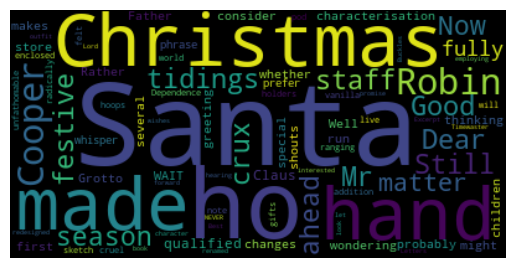

In [123]:
word_cloud = WordCloud().generate(email_body)
plt.imshow(word_cloud,interpolation='bilinear')  #imshow -> show the image object  #interpolation -> smooth edges,clean pic
plt.axis('off')
plt.show()

In [124]:
example_corpus = nltk.corpus.gutenberg.words('melville-moby_dick.txt')
len(example_corpus)

260819

In [125]:
type(example_corpus)

nltk.corpus.reader.util.StreamBackedCorpusView

In [126]:
# This thing that we're working with actually has a whole bunch of tokens.

# If you wanted to get the list of words, you have to kind of join them together,

# you have to join all the tokens together.

In [127]:
# before joining
example_corpus

['[', 'Moby', 'Dick', 'by', 'Herman', 'Melville', ...]

In [128]:
#python list comprehension to join all the tokens together
word_list =[''.join(word) for word in example_corpus]
word_list

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.',
 '(',
 'Supplied',
 'by',
 'a',
 'Late',
 'Consumptive',
 'Usher',
 'to',
 'a',
 'Grammar',
 'School',
 ')',
 'The',
 'pale',
 'Usher',
 '--',
 'threadbare',
 'in',
 'coat',
 ',',
 'heart',
 ',',
 'body',
 ',',
 'and',
 'brain',
 ';',
 'I',
 'see',
 'him',
 'now',
 '.',
 'He',
 'was',
 'ever',
 'dusting',
 'his',
 'old',
 'lexicons',
 'and',
 'grammars',
 ',',
 'with',
 'a',
 'queer',
 'handkerchief',
 ',',
 'mockingly',
 'embellished',
 'with',
 'all',
 'the',
 'gay',
 'flags',
 'of',
 'all',
 'the',
 'known',
 'nations',
 'of',
 'the',
 'world',
 '.',
 'He',
 'loved',
 'to',
 'dust',
 'his',
 'old',
 'grammars',
 ';',
 'it',
 'somehow',
 'mildly',
 'reminded',
 'him',
 'of',
 'his',
 'mortality',
 '.',
 '"',
 'While',
 'you',
 'take',
 'in',
 'hand',
 'to',
 'school',
 'others',
 ',',
 'and',
 'to',
 'teach',
 'them',
 'by',
 'what',
 'name',
 'a',
 'whale',
 '-',
 'fish',
 'is',
 'to',
 'be',
 

In [129]:
# we're going from tokens to a list of words which we can then use to join together into a single string.

In [130]:
# This here will actually take all the words out of the list and put them into a single string
novel_as_string =' '.join(word_list)
novel_as_string

'[ Moby Dick by Herman Melville 1851 ] ETYMOLOGY . ( Supplied by a Late Consumptive Usher to a Grammar School ) The pale Usher -- threadbare in coat , heart , body , and brain ; I see him now . He was ever dusting his old lexicons and grammars , with a queer handkerchief , mockingly embellished with all the gay flags of all the known nations of the world . He loved to dust his old grammars ; it somehow mildly reminded him of his mortality . " While you take in hand to school others , and to teach them by what name a whale - fish is to be called in our tongue leaving out , through ignorance , the letter H , which almost alone maketh the signification of the word , you deliver that which is not true ." -- HACKLUYT " WHALE . ... Sw . and Dan . HVAL . This animal is named from roundness or rolling ; for in Dan . HVALT is arched or vaulted ." -- WEBSTER \' S DICTIONARY " WHALE . ... It is more immediately from the Dut . and Ger . WALLEN ; A . S . WALW - IAN , to roll , to wallow ." -- RICHA

In [131]:
# I'm planning to give my word cloud a simple string.

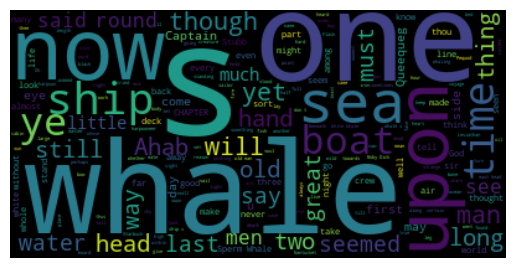

In [132]:
word_cloud = WordCloud().generate(novel_as_string)
plt.imshow(word_cloud,interpolation='bilinear')  #imshow -> show the image object  #interpolation -> smooth edges,clean pic
plt.axis('off')
plt.show()

In [133]:
# We've successfully extracted, all the words from a corpus in the NLTK resources and fed them into our word cloud package.

In [134]:
# pillow package -> pixel manipulation, image blurring, smoothing or adding text
# We're going to be using pillow to convert our starting image of the whale to grayscale and then to an array of RGB values

In [135]:
# mask (nd array)-> the reason is that wordcloud actually expects pixel by pixel information on the image in this array format.
# pixel info means pixel color
#provide pixel color information by RGB (red,blue,green)
#RGB -> scale between 0-255

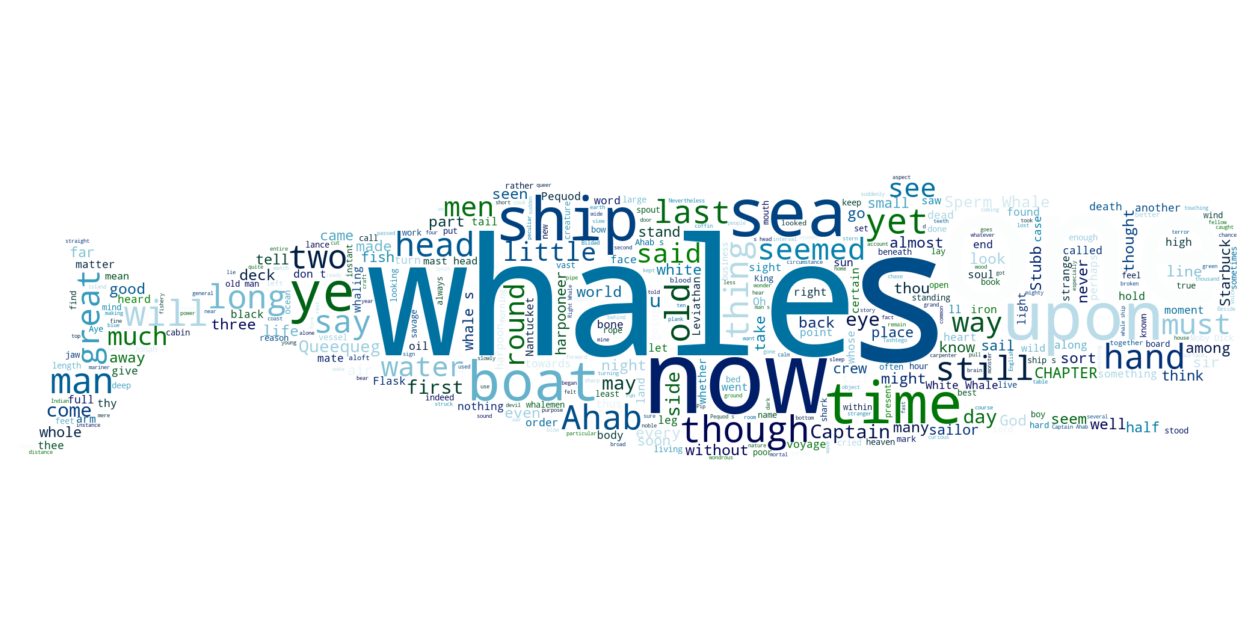

In [136]:
icon = Image.open(WHALE_FILE)
# create new blank image object from pillow
image_mask= Image.new(mode='RGB',size = icon.size, color = (255,255,255)) #red,green,blue
# What this will do is it will paste the picture of our whale onto our blank canvas.
image_mask.paste(icon, box=icon)
rgb_array = np.array(image_mask) #convert the image object to an array



word_cloud = WordCloud(mask=rgb_array, background_color ='white',
                  max_words=400, colormap='ocean')

word_cloud.generate(novel_as_string) # in two line because of readibility

plt.figure(figsize=(16,8))
plt.imshow(word_cloud,interpolation='bilinear')  #imshow -> show the image object  #interpolation -> smooth edges,clean pic
plt.axis('off')
plt.show()

In [137]:
rgb_array.shape

(1024, 2048, 3)

In [138]:
rgb_array[1023,2047]

array([255, 255, 255], dtype=uint8)

In [139]:
rgb_array[500,1000]

array([0, 0, 0], dtype=uint8)

In [140]:
# challenge: use the skull image in the lesson resources to create a word cloud
# for shakespear's play Hamlet

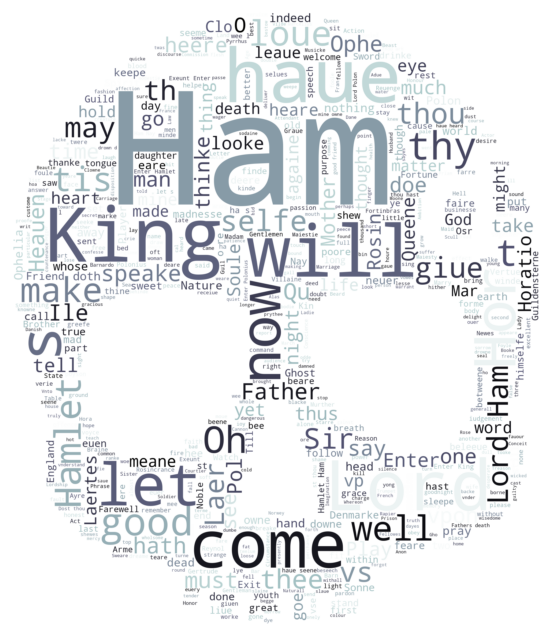

In [141]:
hamlet_corpus = nltk.corpus.gutenberg.words('shakespeare-hamlet.txt')
word_list =[''.join(word) for word in hamlet_corpus]
hamlet_as_string =' '.join(word_list)


skull_icon = Image.open(SKULL_FILE)
image_mask= Image.new(mode='RGB',size = skull_icon.size, color = (255,255,255)) 
image_mask.paste(skull_icon, box=skull_icon)
rgb_array = np.array(image_mask)

word_cloud = WordCloud(mask=rgb_array, background_color ='white',
                  max_words=600, colormap='bone')
word_cloud.generate(hamlet_as_string) 

plt.figure(figsize=(16,8))
plt.imshow(word_cloud,interpolation='bilinear') 
plt.axis('off')
plt.show()

# Word Cloud for Ham and Spam Messages

In [142]:
# To create word cloud for our ham messages and our spam messages,we're gonna use two different masks.
# the dataset came from flat_list_ham, flat_list_spam
# go to the constant and create thumbs up and doen

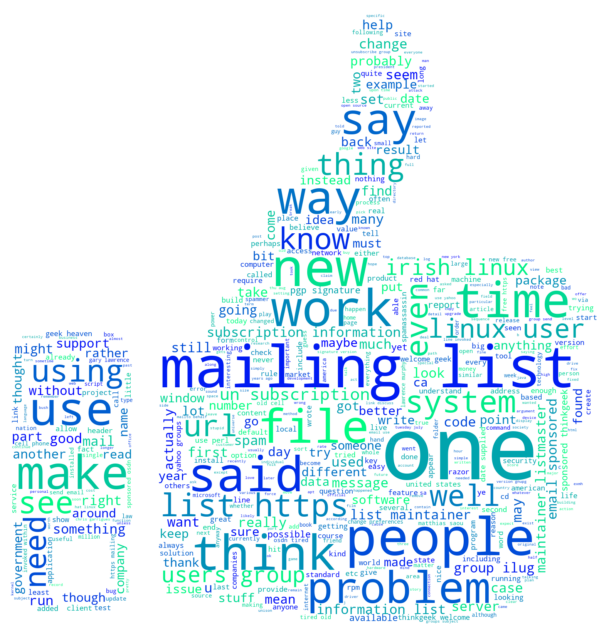

In [143]:
icon = Image.open(THUMBS_UP_FILE)
# create new blank image object from pillow
image_mask= Image.new(mode='RGB',size = icon.size, color = (255,255,255)) #red,green,blue
# What this will do is it will paste the picture of our whale onto our blank canvas.
image_mask.paste(icon, box=icon)
rgb_array = np.array(image_mask) #convert the image object to an array

# Generate the text as a string for the word cloud

ham_str = ' '.join(flat_list_ham)  # join all the ham into a single string

word_cloud = WordCloud(mask=rgb_array, background_color ='white',
                  max_words=500, colormap='winter')

word_cloud.generate(ham_str) 
plt.figure(figsize=(16,8))
plt.imshow(word_cloud,interpolation='bilinear')  #imshow -> show the image object  #interpolation -> smooth edges,clean pic
plt.axis('off')
plt.show()

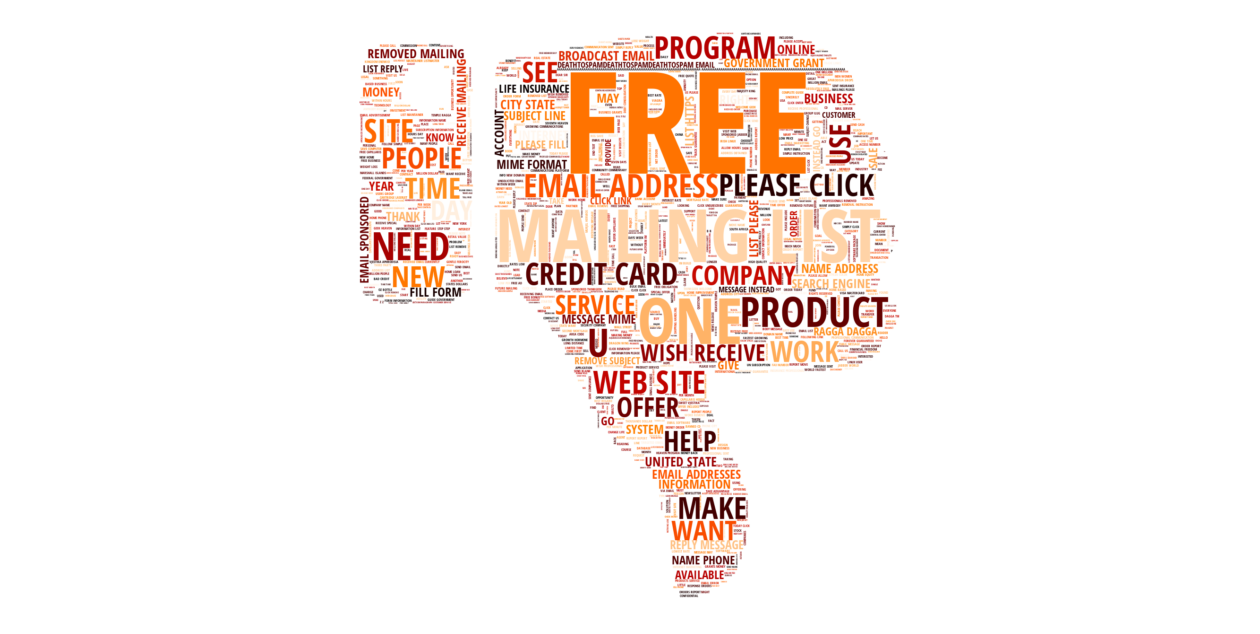

In [150]:
icon = Image.open(THUMBS_DOWN_FILE)
image_mask= Image.new(mode='RGB',size = icon.size, color = (255,255,255))
image_mask.paste(icon, box=icon)
rgb_array = np.array(image_mask)

# Generate the text as a string for the word cloud

spam_str = ' '.join(flat_list_spam)  # join all the spam into a single string
word_cloud = WordCloud(mask=rgb_array, background_color ='white',
                  max_words=2000, colormap='gist_heat', font_path=CUSTOM_FONT_FILE, max_font_size = 300)

word_cloud.generate(spam_str.upper()) #upper case
plt.figure(figsize=(16,8))
plt.imshow(word_cloud,interpolation='bilinear')  
plt.axis('off')
plt.show()

In [145]:
###########IMP############
# Above plots are from stemmed words
# need to modify a bit in the code -> clean_msg_no_html and rerun all the code

#The stemmed words are going to be  useful for our Bayes' classifier but they're actually not so useful for our word cloud.

## Generate Vocabulary and Dictionary

In [ ]:
# for pre-processing our bays classifier, we wanna Create a vocabulary and dictionary
# in total we have 5800 emails and among them there are lots of individuals words
# we are going to use 2500/5800 most frequent one
# these words are from our stemmed list

In [153]:
stemmed_nested_list = data.MESSAGE.apply(clean_msg_no_html)  #nested list
flat_stemmed_list = [item for sublist in stemmed_nested_list for item in sublist] #flatten the list above

C:\Users\tmost\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
C:\Users\tmost\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\bs4\__init__.py:404: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


In [ ]:
#getting a unique set of words that make up our vocabulary
# the easiest way to do this is to generate a pandas series and then use the "value_counts" method.

In [159]:
# After cleaning and stemming our dataset we are ending with 27000 unique words across all our email bodies.
unique_words = pd.Series(flat_stemmed_list).value_counts()
print('Nr of unique words',unique_words.shape[0])
unique_words.head()

Nr of unique words 27334


http     10660
use       5019
list      4851
email     4367
get       4200
dtype: int64

In [ ]:
#Challenge: 
# Create a subset of this unique words series and store it in a variable called 
# "frequent_words' which will only contain the most frequent 2500 words out of the total?

# afterwards print out the top 10 words.

# These, of course, are going to overlap with the top 5 words that you see above.

In [162]:
# create a subset

frequent_words =unique_words[0:VOCAB_SIZE] # [0:2500]
print('most common words: \n', frequent_words[:10])

most common words: 
 http     10660
use       5019
list      4851
email     4367
get       4200
mail      3983
one       3907
free      3202
time      3042
work      2883
dtype: int64


In [ ]:
# how we would go between series and dataframes

## Create a Vocabuary DataFrame with a WORD-ID

In [174]:
word_ids= list(range(0,VOCAB_SIZE))
vocab = pd.DataFrame({'VOCAB_WORD':frequent_words.index.values},index =word_ids)
vocab.index.name = 'WORD_ID'
vocab.head()

,VOCAB_WORD
WORD_ID,
0,http
1,use
2,list
3,email
4,get


## Save the Vocabulary s a CSV files

In [176]:
vocab.to_csv(WORD_ID_FILE, index_label=vocab.index.name, header =vocab.VOCAB_WORD.name)
# index_label = 'word_ID' = vocab.index.name
# header = 'vocab_word'  = vocab.VOCAB_WORD.name

## Excercise : Checking if a word is part of the vocabulary

In [ ]:
# write a line of code that checks if a particular word is part of the vocabulary? Your code should

# return True if the word is among the 2500 words that comprise the vocabulary and False otherwise.
# Check this word individually : 'machine', 'learning', 'fun', 'learn', 'data', 'science', 'app' and 'brewery'.

In [190]:
any(vocab.VOCAB_WORD == 'machine') # inefficient way

False

In [185]:
#checking the membership 
'machine' in set(vocab.VOCAB_WORD) #better way

False

In [194]:
item =['machine','learning','fun','learn','data','science','app','brewery']

In [208]:
for i in range(item):
    if item in set(vocab.VOCAB_WORD):
        print ('yes')

TypeError: 'list' object cannot be interpreted as an integer

# Exercise: Find the Email with the Most Number of Words

In [ ]:
# challenge :print out the number of words in the longest email - that is after cleaning and stemming 
# I'd like you to note the longest email's position in the list of cleaned emails.
# print out the stemmed list of words in the longest e-mail and print out the longest email from the data dataframe

In [224]:
# for loop
# number of charachter in the emails
clean_email_lengths = []

for sublist in stemmed_nested_list:
    clean_email_lengths.append(len(sublist))
    
#print(clean_email_lengths)
# print (max(clean_email_lengths)) # max number of words 
print('position',np.argmax(clean_email_lengths)) # position/index email

position 5775


In [215]:
# Python list comprehension
clean_email_lengths = [len(sublist) for sublist in stemmed_nested_list]
print('Nr of words in the longest email',max(clean_email_lengths))

Nr of words in the longest email 7671


In [217]:
# argmax gives us the location of the largest value in this list
print('Email position in the list(and the data dataframe)' ,np.argmax(clean_email_lengths))

Email position in the list(and the data dataframe) 5775


In [226]:
# list of words in this email 
stemmed_nested_list[np.argmax(clean_email_lengths)]

['yahoo',
 'group',
 'sponsor',
 'dvd',
 'free',
 'p',
 'join',
 'http',
 'new',
 'version',
 'unison',
 'avail',
 'test',
 'incorpor',
 'sever',
 'small',
 'improv',
 'main',
 'chang',
 'fix',
 'bug',
 'potenti',
 'seriou',
 'safeti',
 'consequ',
 'small',
 'number',
 'user',
 'habit',
 'run',
 'one',
 'instanc',
 'unison',
 'time',
 'parallel',
 'user',
 'strongli',
 'encourag',
 'upgrad',
 'other',
 'wait',
 'wish',
 'releas',
 'includ',
 'execut',
 'linux',
 'solari',
 'window',
 'look',
 'maintain',
 'moment',
 'none',
 'activ',
 'develop',
 'regularli',
 'use',
 'unison',
 'window',
 'machin',
 'configur',
 'properli',
 'build',
 'execut',
 'export',
 'grab',
 'http',
 'enjoy',
 'benjamin',
 'chang',
 'sinc',
 'ad',
 'prefer',
 'maxthread',
 'use',
 'limit',
 'number',
 'simultan',
 'file',
 'transfer',
 'ad',
 'backupdir',
 'prefer',
 'control',
 'backup',
 'file',
 'store',
 'basic',
 'support',
 'ad',
 'osx',
 'particular',
 'unison',
 'recogn',
 'one',
 'host',
 'synchron',
 

In [227]:
# what about pulling out the original email from the dataframe?
# row location -> iat
# row name -> at
data.at[np.argmax(clean_email_lengths),'MESSAGE']

'------------------------ Yahoo! Groups Sponsor ---------------------~-->\n\n4 DVDs Free +s&p Join Now\n\nhttp://us.click.yahoo.com/pt6YBB/NXiEAA/Ey.GAA/26EolB/TM\n\n---------------------------------------------------------------------~->\n\n\n\nA new version of unison is now available for testing.  It incorporates\n\nseveral small improvements over 2.9.1, but the main change is a fix to\n\na bug that had potentially serious safety consequences, but only for\n\nthe very small number of users that are in the habit of running more\n\nthan one instance of Unison at a time, in parallel.  These users are\n\nstrongly encouraged to upgrade.  Others can wait if they wish.\n\n\n\nThe release includes pre-built executables for Linux and Solaris, but\n\nnot Windows.  (We are looking for a Unison-Windows maintainer -- at\n\nthe moment, none of the active developers are regularly using Unison\n\non Windows, and we do not have a machine that is configured properly\n\nfor building executables for exp

# Generate Features & a Sparse Matrix

### Creating a DataFrame with one Word per Column

In [228]:
stemmed_nested_list

DOC_ID
0       [save, life, insur, spend, life, quot, save, g...
1       [fight, risk, cancer, http, slim, guarante, lo...
2       [fight, risk, cancer, http, slim, guarante, lo...
3       [adult, club, offer, free, membership, instant...
4       [thought, might, like, slim, guarante, lose, l...
                              ...                        
5791    [http, bizarr, collect, stuf, anim, could, fet...
5792    [care, use, one, also, realli, cute, thing, ja...
5793    [sm, skip, montanaro, write, jeremi, put, anot...
5794    [mark, hammond, like, given, zodb, sound, attr...
5795    [hi, probabl, use, whatsoev, also, problem, re...
Name: MESSAGE, Length: 5796, dtype: object

In [ ]:
# we're going to convert it(pandas series) from a series containing lists to one of a list containing lists.
# the reason for doing that is that there exists a handy method to convert list of lists into a dataframe.

In [229]:
type(stemmed_nested_list)

pandas.core.series.Series

In [231]:
type(stemmed_nested_list.tolist())

list

In [234]:
word_columns_df = pd.DataFrame(stemmed_nested_list.tolist())
word_columns_df.head()

,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
0,save,life,insur,spend,life,quot,save,g,famili,financi,...,None,None,None,None,None,None,None,None,None,None
1,fight,risk,cancer,http,slim,guarante,lose,lb,day,http,...,None,None,None,None,None,None,None,None,None,None
2,fight,risk,cancer,http,slim,guarante,lose,lb,day,http,...,None,None,None,None,None,None,None,None,None,None
3,adult,club,offer,free,membership,instant,access,site,user,name,...,None,None,None,None,None,None,None,None,None,None
4,thought,might,like,slim,guarante,lose,lb,day,http,fight,...,None,None,None,None,None,None,None,None,None,None


In [235]:
word_columns_df = pd.DataFrame.from_records(stemmed_nested_list.tolist())
word_columns_df.head()

,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
0,save,life,insur,spend,life,quot,save,g,famili,financi,...,None,None,None,None,None,None,None,None,None,None
1,fight,risk,cancer,http,slim,guarante,lose,lb,day,http,...,None,None,None,None,None,None,None,None,None,None
2,fight,risk,cancer,http,slim,guarante,lose,lb,day,http,...,None,None,None,None,None,None,None,None,None,None
3,adult,club,offer,free,membership,instant,access,site,user,name,...,None,None,None,None,None,None,None,None,None,None
4,thought,might,like,slim,guarante,lose,lb,day,http,fight,...,None,None,None,None,None,None,None,None,None,None


In [236]:
# number of email,number of words
word_columns_df.shape

(5796, 7671)

### Spliting the Data into a Training and Testing Dataset 

In [ ]:
# challenge: split the data into a training and testing dataset using scikit-learn?  test size at 30%
# the training data should include 4057 emails
# set the seed value to 42

In [298]:
X = word_columns_df
y = data.CATEGORY

In [299]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [300]:
print('Nr of training samples',X_train.shape[0])
print('Fraction of training set',X_train.shape[0] / word_columns_df.shape[0]) # total number of enteries

Nr of training samples 4057
Fraction of training set 0.6999654934437544


In [301]:
# get an index for test and train
X_train.index.name = X_test.index.name = 'DOC_ID'

# these are the first five rows of our shuffled "word_columns_df".
X_train.head()


,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
DOC_ID,,,,,,,,,,,,,,,,,,,,,
4844,ye,inde,agent,directori,verita,cd,unix,subdirectori,file,call,...,None,None,None,None,None,None,None,None,None,None
4727,problem,come,tri,instal,harddissssk,like,alreadi,mount,http,yahoo,...,None,None,None,None,None,None,None,None,None,None
5022,origin,messag,date,mon,aug,chad,norwood,sven,cc,subject,...,None,None,None,None,None,None,None,None,None,None
3504,inlin,folk,sever,major,internet,outag,morn,across,major,provid,...,None,None,None,None,None,None,None,None,None,None
3921,url,http,date,bath,chronicl,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [302]:
y_train.head()

DOC_ID
4844    0
4727    0
5022    0
3504    0
3921    0
Name: CATEGORY, dtype: int64

## Create a Sparse Matrix for the Training Data

In [ ]:
# to turn a particular column of our dataframe into an index
# select our dataframe and put in pd.index

In [330]:
word_index = pd.Index(vocab.VOCAB_WORD)
word_index
type(word_index[8])

str

In [331]:
vocab.VOCAB_WORD

WORD_ID
0           http
1            use
2           list
3          email
4            get
          ...   
2495         bob
2496    occasion
2497      bullet
2498      steven
2499      analog
Name: VOCAB_WORD, Length: 2500, dtype: object

In [332]:
word_index

Index(['http', 'use', 'list', 'email', 'get', 'mail', 'one', 'free', 'time',
       'work',
       ...
       'distributor', 'layer', 'ximian', 'fashion', 'elig', 'bob', 'occasion',
       'bullet', 'steven', 'analog'],
      dtype='object', name='VOCAB_WORD', length=2500)

In [333]:
#Practice indexing
# what is the word.id for the string email=
vocab.VOCAB_WORD.iloc[3]

'email'

In [336]:
#Practice indexing
# what is the Vocab_word for index 3
word_index.get_loc('email')

3

In [304]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
DOC_ID,,,,,,,,,,,,,,,,,,,,,
4844,ye,inde,agent,directori,verita,cd,unix,subdirectori,file,call,...,None,None,None,None,None,None,None,None,None,None
4727,problem,come,tri,instal,harddissssk,like,alreadi,mount,http,yahoo,...,None,None,None,None,None,None,None,None,None,None
5022,origin,messag,date,mon,aug,chad,norwood,sven,cc,subject,...,None,None,None,None,None,None,None,None,None,None
3504,inlin,folk,sever,major,internet,outag,morn,across,major,provid,...,None,None,None,None,None,None,None,None,None,None
3921,url,http,date,bath,chronicl,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


We're going to take our X_train dataframe and we'll take the information contained there in to create our sparse matrix.

In [276]:
X_train.index[0]

4844

In [324]:
y_train

DOC_ID
4844    0
4727    0
5022    0
3504    0
3921    0
       ..
3772    0
5191    0
5226    0
5390    0
860     1
Name: CATEGORY, Length: 4057, dtype: int64

In [277]:
y_train.at[4844]

0

In [278]:
word_index.get_loc('thu')

393

In [279]:
word_index.get_loc('jul')

493

In [280]:
# because the word "rodent" doesn't occur frequently enough to have made it into our vocabulary.-> not to sparse matrix
word_index.get_loc('rodent')

KeyError: 'rodent'

In [281]:
word_index.get_loc('unusu')

2357

In [338]:
def make_sparse_matrix(df, indexed_words,labels): 
    """"
    Retruns sparse matrix as a dataframe.
    
    df: A Dataframe with words in the columns with a document id as an index (X_train,X_test)
    indexed_words : index of words ordered by word id
    labels: category as a series (y_train,y_test)
    
    """
    
    nr_rows = df.shape[0]
    nr_cols = df.shape[1]
    word_set = set(indexed_words) # check if part of our vocab list
    dict_list = []
    
    for i in range(nr_rows):
        for j in range(nr_cols):
            
            word = df.iat[i,j]
            if word in word_set:
                doc_id = df.index[i]
                word_id = indexed_words.get_loc(word)
                category = labels.at[doc_id]
                
                
                item = {'LABEL':category,'DOC':doc_id,'OCCURANCE':1, 'WORD_ID':word_id} #DOC =DOC_ID (there is a typo)
                dict_list.append(item)
    
    
    return pd.DataFrame(dict_list)

In [289]:
%%time

sparse_train_df = make_sparse_matrix(X_train, word_index, y_train)

CPU times: total: 16min 26s
Wall time: 16min 38s


In [290]:
sparse_train_df[:5]

,LABEL,DOC,OCCURANCE,WORD_ID
0,0,4844,1,265
1,0,4844,1,1243
2,0,4844,1,502
3,0,4844,1,308
4,0,4844,1,254


In [293]:
sparse_train_df.shape

(429241, 4)

In [295]:
sparse_train_df[-5:]

,LABEL,DOC,OCCURANCE,WORD_ID
429236,1,860,1,47
429237,1,860,1,1431
429238,1,860,1,26
429239,1,860,1,21
429240,1,860,1,126


In [296]:
sparse_train_df.tail(5)

,LABEL,DOC,OCCURANCE,WORD_ID
429236,1,860,1,47
429237,1,860,1,1431
429238,1,860,1,26
429239,1,860,1,21
429240,1,860,1,126


## Combine Occurance with the Pandas groupby() method

In [ ]:
# group our words by email

In [344]:
train_grouped = sparse_train_df.groupby(['DOC','WORD_ID','LABEL']).sum()
train_grouped.head()

OCCURANCE
DOC WORD_ID LABEL           
0   2       1              1
    3       1              2
    4       1              1
    7       1              3
    11      1              1

In [351]:
vocab.at[0,'VOCAB_WORD']

'http'

In [356]:
train_grouped = train_grouped.reset_index()
train_grouped.head()

,index,DOC,WORD_ID,LABEL,OCCURANCE
0,0,0,2,1,1
1,1,0,3,1,2
2,2,0,4,1,1
3,3,0,7,1,3
4,4,0,11,1,1


In [357]:
train_grouped.tail()

,index,DOC,WORD_ID,LABEL,OCCURANCE
258355,258355,5795,2035,0,2
258356,258356,5795,2040,0,1
258357,258357,5795,2272,0,1
258358,258358,5795,2342,0,1
258359,258359,5795,2370,0,1


In [361]:
vocab.at[2035,'VOCAB_WORD']

'swap'

In [362]:
data.MESSAGE[5795]

"Hi there,\n\n\n\nNow this is probably of no use to you whatsoever, but...\n\n\n\nNot a deb-head, but I also have a problem regards NVidia. I've two machines,\n\npretty much the same hardware. \n\nathlon 1700XP's, both have NVidia cards, one Gforce3 Ti and a Gforce2MX,\n\nboth use the same driver module. \n\n\n\nBoth have same kernel version albeit it compiled for their particular\n\nhardware.\n\n\n\nOne works perfectly, the other fails to load. When I check with lsmod, I can\n\nsee the NVdriver is loaded, but not used ;--(\n\nThus when I startx, it bombs out. \n\n\n\nIU still have X with the default nv driver and crappy accelleration -->\n\n650fps with glxgears [should be over 2000fps]\n\nIts not a hardware issue with the cards as I swapped them over and get the\n\nsame symptoms. \n\n\n\nI reckon my mobo is cack, I've tried swapping slots around, reserving\n\nresources etc all to no avail. \n\nShould there be an interrupt for the nv card? I haven't checked the other\n\nbox yet.\n\n\n\

In [ ]:
# How big of a reduction we have achieved?  We've gone from 450000 to approximate 265000 rows 40% reduction

In [363]:
train_grouped.shape

(258360, 5)

### Save Training Data as .txt File

In [366]:
np.savetxt(TRAINING_DATA_FILE,train_grouped, fmt ='%d')

In [367]:
train_grouped.columns

Index(['index', 'DOC', 'WORD_ID', 'LABEL', 'OCCURANCE'], dtype='object')

### Challenge

can you create a sparse matrix for the test data and then group all the occurrences of the same word
in the same email together just like we did with the training data?  
then save the data as a txt file.

In [371]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
DOC_ID,,,,,,,,,,,,,,,,,,,,,
4675,interest,alway,wonder,thing,bad,exampl,goto,languag,support,goto,...,None,None,None,None,None,None,None,None,None,None
4220,url,http,date,final,gdc,europ,review,confernec,session,ect,...,None,None,None,None,None,None,None,None,None,None
2484,stephen,william,mailto,swilliam,weaken,food,transact,argument,note,neighborhood,...,None,None,None,None,None,None,None,None,None,None
2418,el,mon,sep,bitbitch,wrote,eugen,mani,homo,friend,lover,...,None,None,None,None,None,None,None,None,None,None
5110,music,school,joke,american,conductor,european,conductor,talk,european,conductor,...,None,None,None,None,None,None,None,None,None,None


In [372]:
y_test.head()

DOC_ID
4675    0
4220    0
2484    0
2418    0
5110    0
Name: CATEGORY, dtype: int64

In [373]:
X_test.shape

(1739, 7671)

In [374]:
%%time

sparse_test_df= make_sparse_matrix(X_test, word_index, y_test)


CPU times: total: 4min 50s
Wall time: 4min 59s


In [375]:
sparse_test_df.shape

(203366, 4)

In [379]:
test_grouped = sparse_test_df.groupby(['DOC','WORD_ID','LABEL']).sum().reset_index()
test_grouped.head()

,DOC,WORD_ID,LABEL,OCCURANCE
0,8,2,1,1
1,8,3,1,4
2,8,4,1,2
3,8,5,1,1
4,8,6,1,2


In [380]:
test_grouped.shape

(117776, 4)

In [384]:
np.savetxt(TEST_DATA_FILE, test_grouped, fmt ='%d')

## Pre-Processing Subtleties and Checking your Understanding

In [ ]:
# pre-processing
# subtelties
# data munching

In [ ]:
# we start with 5796 emails.
# we split it into 4057 emails for training and 1739 emails for testing.

# how many of these individual emails were actually included in the text files that we saved to our disk?

In [ ]:
# Can you figure out how many individual testing emails were included in the txt file that we saved

# to the disk using the "train_grouped" dataframe and then compare that to the amount of emails in X_test?

In [ ]:
# After splitting and shuffling our data, how many individual emails were actually

# included in the X_test dataframe? Is the number the same? And if not, which emails were excluded and why? 
# I recommend comparing the doc ID values to find out. Did you have a go at this?

In [385]:
# nuber of individual emails using set
train_doc_ids = set(train_grouped.DOC)
test_doc_ids = set(test_grouped.DOC)

In [386]:
# individual emails in the training set
len(train_doc_ids)

4013

In [387]:
# individual emails in the test set
len(test_doc_ids)

1724

In [388]:
len(X_test)  # so 15 emails have missing or excluded

1739

In [ ]:
# which emails were excluded?

In [392]:
# which values are included in this one but missing from this one, all I have to do is take the difference between the two 
set(X_test.index.values) - test_doc_ids

{134, 179, 240, 274, 298, 339, 439, 471, 670, 734, 765, 945, 1544, 1670, 1700}

In [400]:
data.MESSAGE[134]

'------=_NextPart_000_00E8_85C13B1D.B7243B86\n\nContent-Type: text/html; charset="iso-8859-1"\n\nContent-Transfer-Encoding: base64\n\n\n\n\n\nPGh0bWw+DQoNCjxib2R5IGJnY29sb3I9IiNGRkZGRkYiIHRleHQ9IiMwMDAw\n\nMDAiPiANCjxwIGFsaWduPSJjZW50ZXIiPjxhIGhyZWY9Imh0dHA6Ly93d3cu\n\nZGlyZWN0d2Vic3RvcmUuY29tL3RveXMvaW5kZXguaHRtbCI+PGltZyBzcmM9\n\nImh0dHA6Ly93d3cuZGlyZWN0d2Vic3RvcmUuY29tL21waWMuanBnIiB3aWR0\n\naD0iNTAwIiBoZWlnaHQ9IjMzOSIgYm9yZGVyPSIwIj48L2E+PGJyPiANCjxm\n\nb250IHNpemU9IjMiIGZhY2U9IkFyaWFsLCBIZWx2ZXRpY2EsIHNhbnMtc2Vy\n\naWYiPjxhIGhyZWY9Imh0dHA6Ly93d3cuZGlyZWN0d2Vic3RvcmUuY29tL3Rv\n\neXMvaW5kZXguaHRtbCI+PGI+RU5URVIgDQpOT1cgaWYgeW91IGFyZSAxOCBh\n\nbmQgb3ZlcjwvYj48L2E+PC9mb250PjwvcD4gDQo8cCBhbGlnbj0iY2VudGVy\n\nIj48Zm9udCBmYWNlPSJBcmlhbCwgSGVsdmV0aWNhLCBzYW5zLXNlcmlmIiBz\n\naXplPSI0IiBjb2xvcj0iI0ZGMDAwMCI+PGI+U1BFQ0lBTCANCk9GRkVSPGJy\n\nPiANCjxmb250IHNpemU9IjUiPjMwIERheXMgPGk+RlJFRSBhY2Nlc3M8L2k+\n\nIDwvZm9udD48YnI+IA0KdG8gdGhlIGxhcmdlc3QgQWR1bHRzaXRlIG9uIHRo\n\nZSB3ZWIuPGJyPiANCjwvYj4gPG

In [ ]:
# the reason these emails look like this is because we had a problem reading this file

# Maybe this is related to our encoding that we used 

In [401]:
data.loc[134]

MESSAGE      ------=_NextPart_000_00E8_85C13B1D.B7243B86\n\...
CATEGORY                                                     1
FILE_NAME               00135.00e388e3b23df6278a8845047ca25160
Name: 134, dtype: object

In [402]:
clean_msg_no_html(data.at[134,'MESSAGE'])

[]